In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis =1, inplace = True)

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df['Amount'] = df['Amount'].astype('int')

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Exploratory Data Analysis

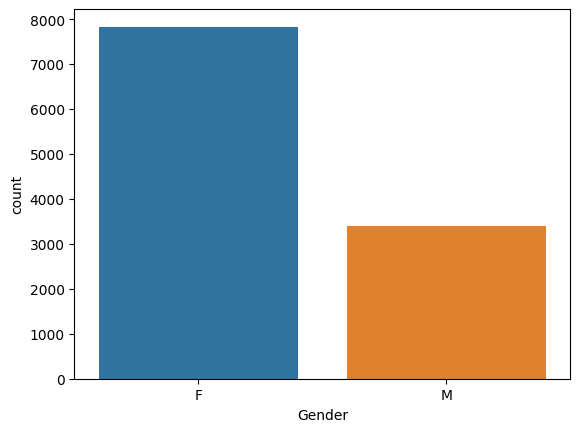

In [11]:
ax = sns.countplot(x = 'Gender', data = df)

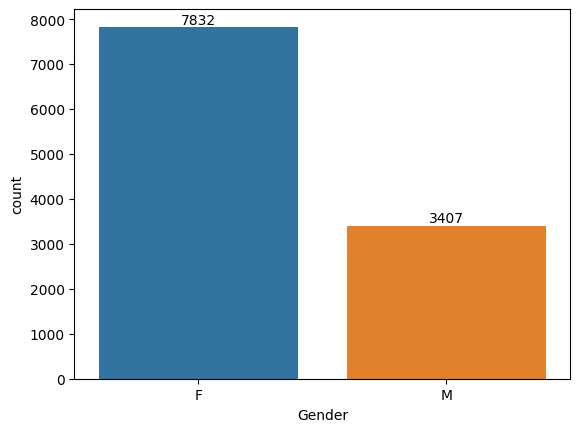

In [12]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot: xlabel='Gender', ylabel='Amount'>

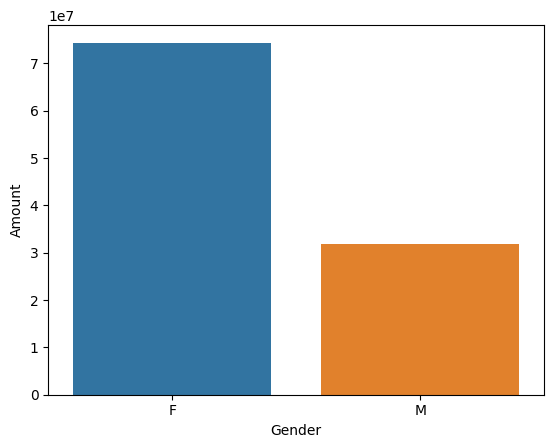

In [13]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

From above Graphs we can see thet most of the buyers are females and even the purchasing power of females are greater than males 

# AGE

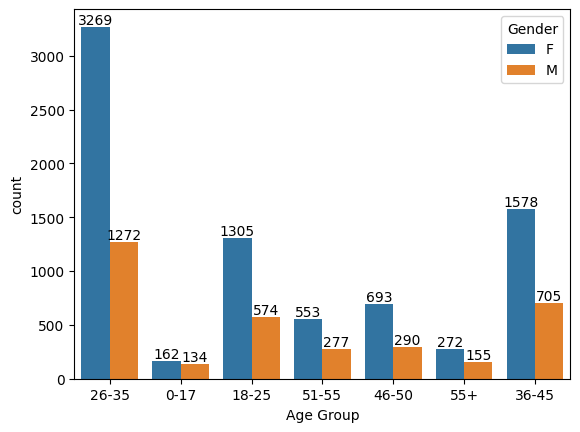

In [14]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot: xlabel='Age Group', ylabel='Amount'>

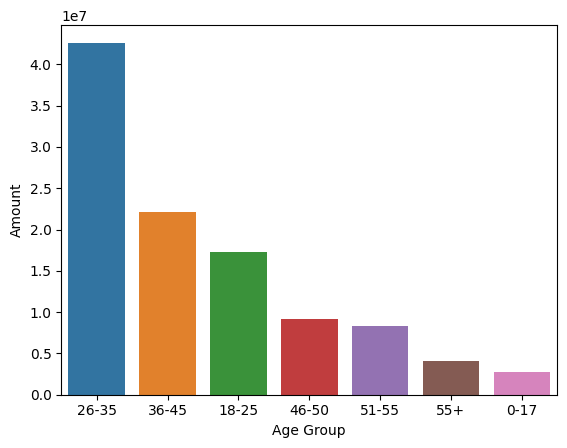

In [22]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

From above graphs we can see that most of the buyers are of age between 25-35 yrs female

# State

<AxesSubplot: xlabel='State', ylabel='Orders'>

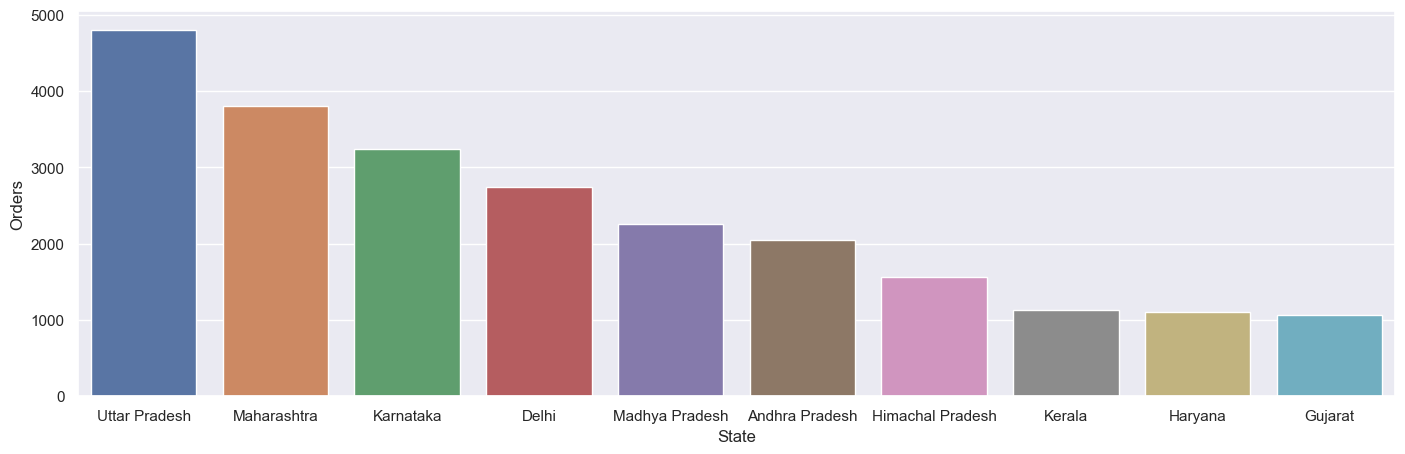

In [31]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

<AxesSubplot: xlabel='State', ylabel='Amount'>

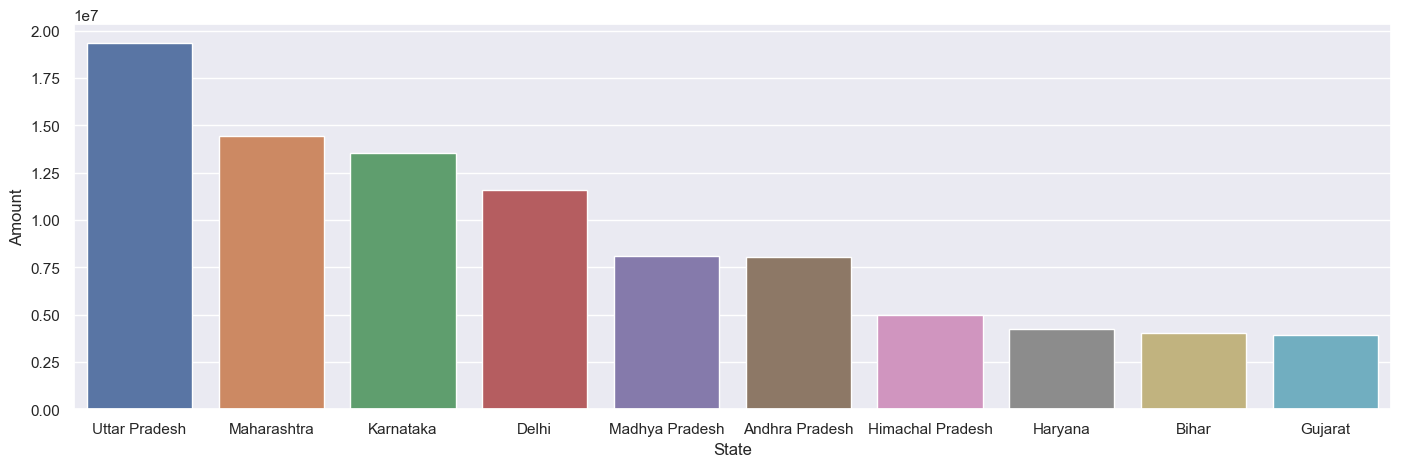

In [34]:
# total amount/state from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

From above graphs we can see that most of the orders & sales/orders are from Uttar Pradesh, Maharashtra and Karnataka  respectively

# Marital Status

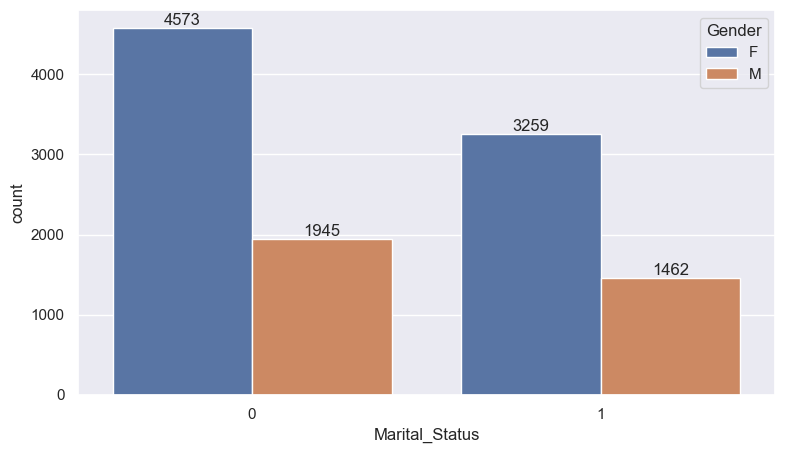

In [43]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender')

sns.set(rc = {'figure.figsize': (9, 5)})
for bars in ax.containers:
    ax.bar_label(bars)

here we can see that most of the buyers are females in respective of their marital status

# Occupation

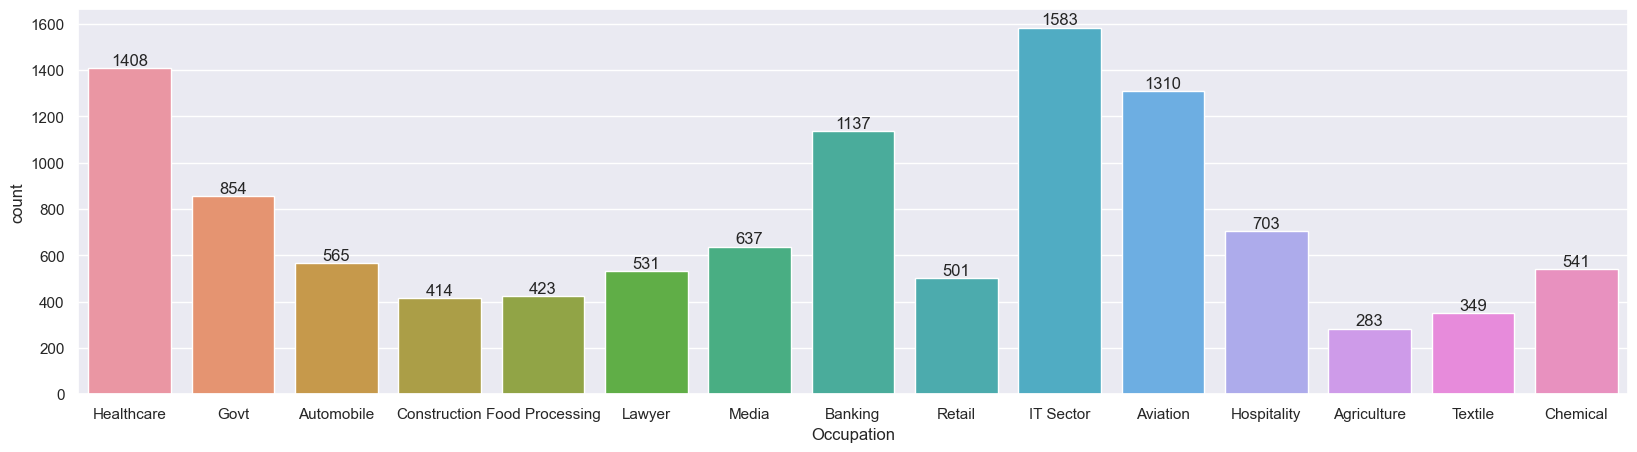

In [53]:
sns.set( rc = {'figure.figsize': (20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot: xlabel='Occupation', ylabel='Amount'>

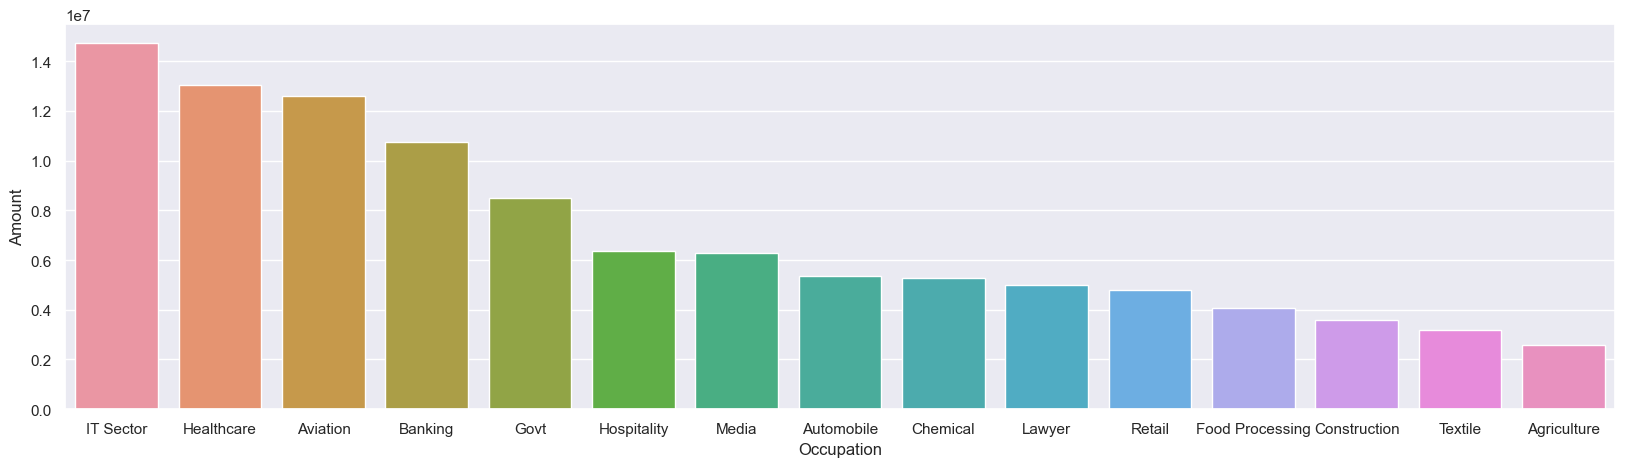

In [62]:
sales = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales, x = 'Occupation', y = 'Amount')

from above graphs we can see that most of the buyers are working in IT, heahealth care and Avation.

# Product Category

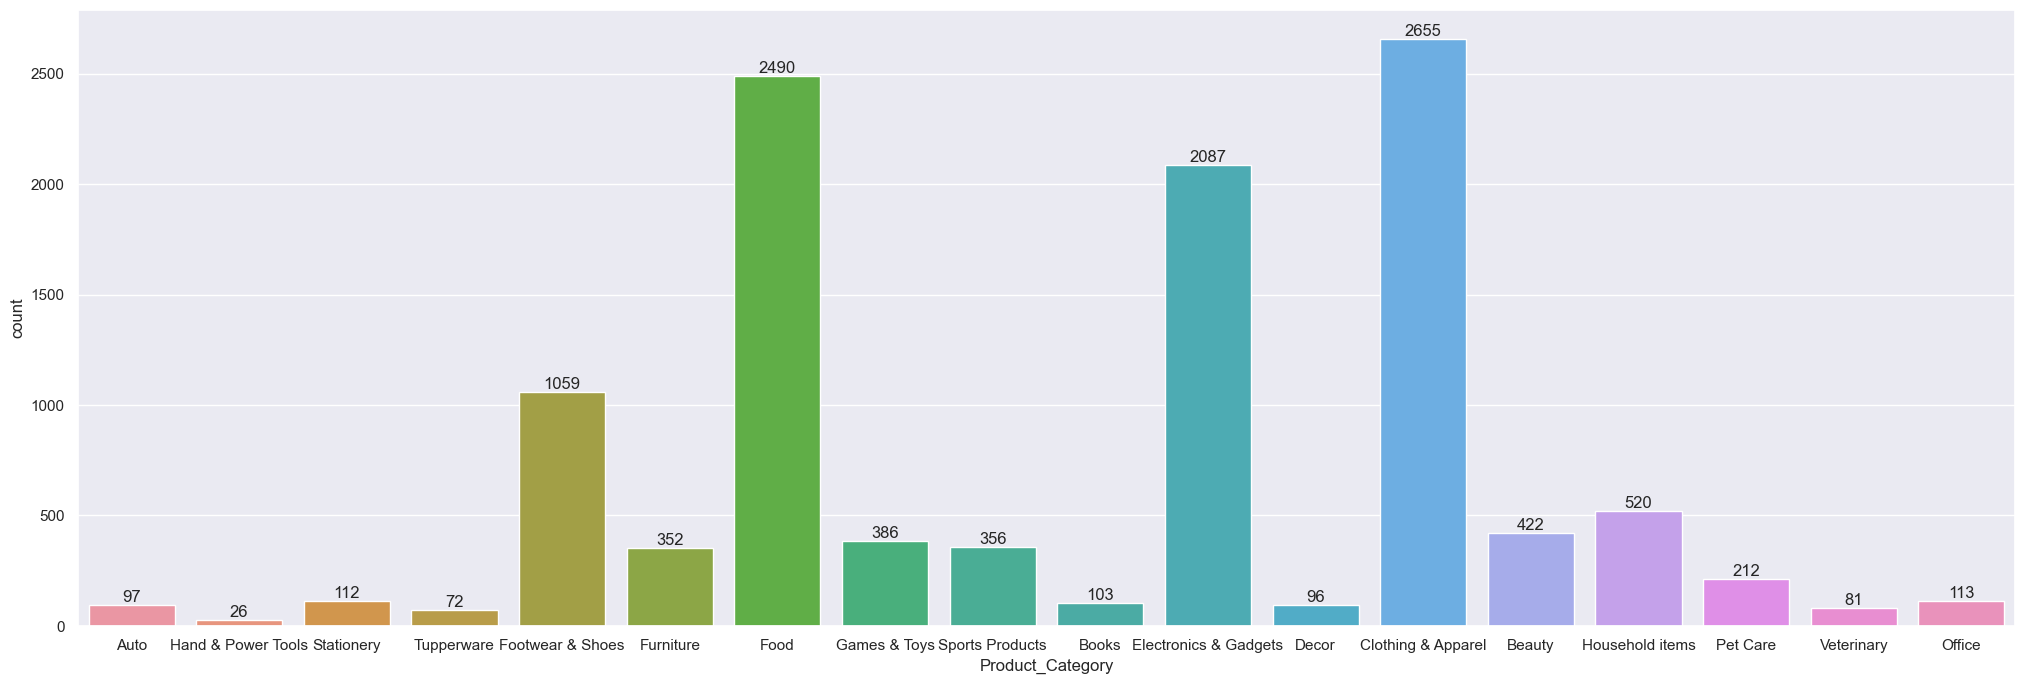

In [75]:
sns.set( rc = {'figure.figsize': (25,8)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot: xlabel='Product_Category', ylabel='Amount'>

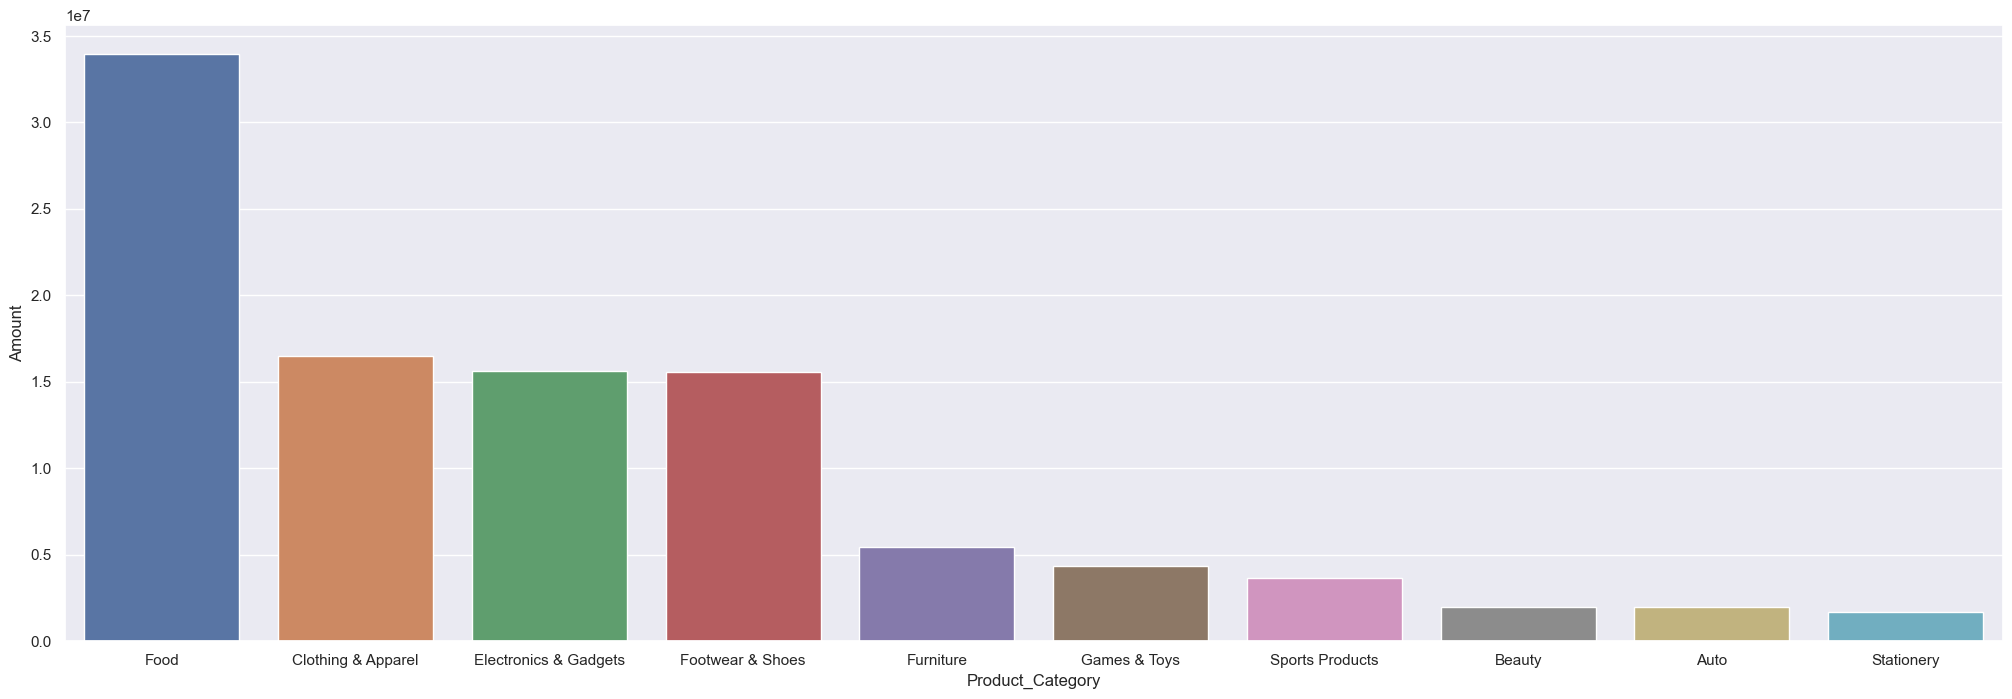

In [82]:
sales = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(data = sales, x = 'Product_Category', y = 'Amount')

In [ ]:
from above we can see that sold products are from food and clothing

# Conclusion 

Married women of age group 26-35 yrs from Uttar Pradesh, Maharashtra and Karnataka working in IT, Health care and Aviation are most likely to buy products from Food, Clothing and Electronics categoty